In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('basic_labeling.csv')
df.head()

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression()


In [5]:
model.fit(X_train, y_train)

c:\Users\shouv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
prediction=model.predict(X_test)

In [7]:
conf_matrix=confusion_matrix(y_test, prediction)

In [8]:
accuracy=accuracy_score(y_test,prediction)

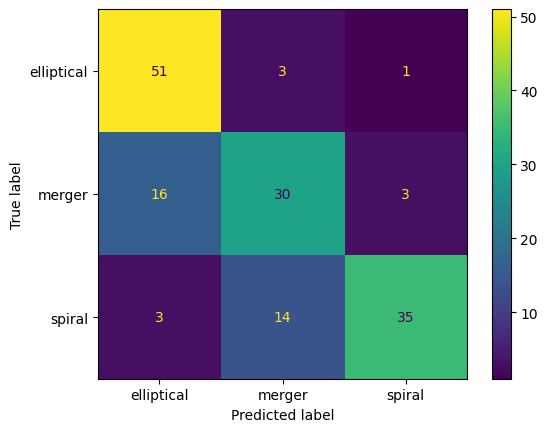

In [9]:
CMD.from_predictions(y_test, prediction)

In [10]:
print(round((accuracy*100),2))

74.36


In [11]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
prediction2=classifier.predict(X_test)

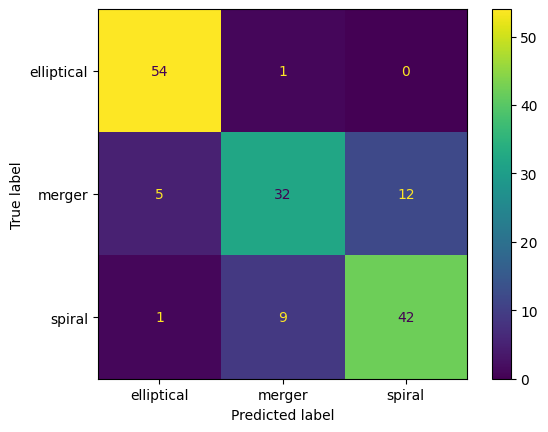

In [13]:
CMD.from_predictions(y_test, prediction2)

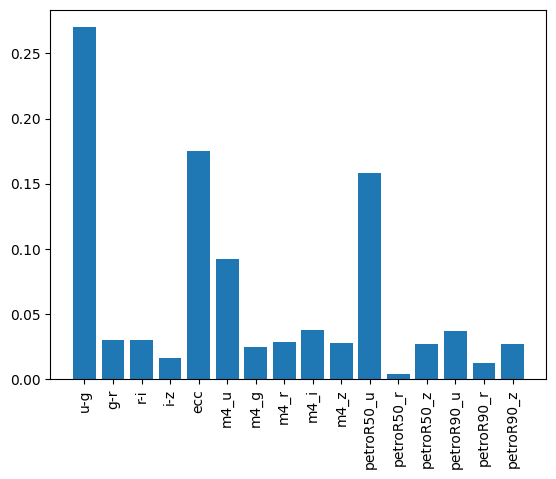

In [14]:
importances = classifier.feature_importances_
indices = range(len(importances))
plt.bar(indices, importances)
plt.xticks(indices, X_train.columns, rotation='vertical')
plt.show()

In [15]:
rand_forest = RandomForestClassifier()

In [16]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
predict_forest = rand_forest.predict(X_test)

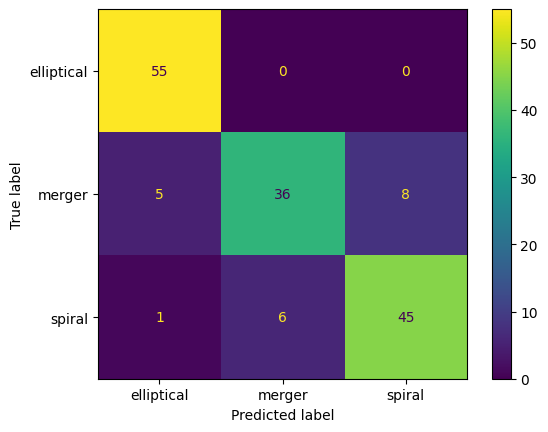

In [18]:
CMD.from_predictions(y_test, predict_forest)

In [19]:
forest_accuracy = accuracy_score(y_test, predict_forest)
print(round(forest_accuracy*100,2))

87.18


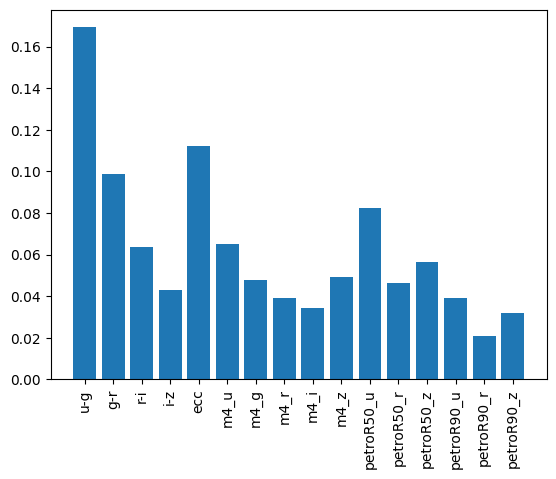

In [20]:
importances = rand_forest.feature_importances_
indices = range(len(importances))
plt.bar(indices, importances)
plt.xticks(indices, X_train.columns, rotation='vertical')
plt.show()